In [5]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize


In [6]:
df=pd.read_csv('Book1.csv',encoding="unicode_escape")
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55081 entries, 0 to 55080
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UNIQUE ID  55081 non-null  int64 
 1   DRUGNAME   55081 non-null  object
 2   CONDITION  54741 non-null  object
 3   REVIEW     55081 non-null  object
 4   RATING     55081 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [8]:
df.describe()

,UNIQUE ID,RATING
count,55081.000000,55081.000000
mean,116116.998203,6.988653
std,66902.047547,3.278503
min,7.000000,1.000000
25%,58587.000000,5.000000
50%,116100.000000,8.000000
75%,173718.000000,10.000000
max,232291.000000,10.000000


In [9]:
df.isnull().any()

UNIQUE ID    False
DRUGNAME     False
CONDITION     True
REVIEW       False
RATING       False
dtype: bool

In [10]:
df.isnull().sum()

UNIQUE ID      0
DRUGNAME       0
CONDITION    340
REVIEW         0
RATING         0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

UNIQUE ID    0
DRUGNAME     0
CONDITION    0
REVIEW       0
RATING       0
dtype: int64

In [13]:
def SIDE_EFFECTS(row):
    if row['RATING'] < 4:
        return ("severe side effect")
    elif row['RATING'] >= 4 and row['RATING'] < 8:
        return ("mild side effect")
    else:
        return ("no side effect")

df['SIDE_EFFECTS'] = df.apply(SIDE_EFFECTS, axis=1)
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,no side effect
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,no side effect
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,mild side effect
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,no side effect
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,no side effect


In [14]:
df.columns

Index(['UNIQUE ID', 'DRUGNAME', 'CONDITION', 'REVIEW', 'RATING',
       'SIDE_EFFECTS'],
      dtype='object')

In [15]:
df["DRUGNAME"] = df["DRUGNAME"].str.replace(r'\W',"")
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,no side effect
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,no side effect
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,mild side effect
3,138000,OrthoEvra,Birth Control,"""This is my first time using any form of birth...",8,no side effect
4,35696,Buprenorphinenaloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,no side effect


In [16]:
drug = ' '.join(df['DRUGNAME'].tolist())
drug

'Valsartan Guanfacine Lybrel OrthoEvra Buprenorphinenaloxone Cialis Levonorgestrel Aripiprazole Keppra Ethinylestradiollevonorgestrel Topiramate Lmethylfolate Pentasa Dextromethorphan Nexplanon Liraglutide Trimethoprim Amitriptyline Lamotrigine Nilotinib Atripla Trazodone Etonogestrel Etanercept Tioconazole Azithromycin Eflornithine Daytrana Ativan Imitrex Sertraline Toradol Tioconazole Viberzi Mobic Dulcolax Morphine MoviPrep Trilafon Fluconazole Contrave Clonazepam Metaxalone Venlafaxine Ledipasvirsofosbuvir Ledipasvirsofosbuvir Symbyax Tamsulosin Doxycycline Dulaglutide Intuniv Buprenorphine Qvar Opdivo Aripiprazole Pyridium Latuda Bupropion Implanon EffexorXR Drospirenoneethinylestradiol Buprenorphine Implanon NuvaRing Prepopik Tretinoin EffexorXR GildessFe120 Ethinylestradiolnorgestimate Elbasvirgrazoprevir Clomiphene Docusatesenna Amitiza Etonogestrel Nexplanon Sildenafil LoLoestrinFe Ledipasvirsofosbuvir Sertraline Oxcarbazepine Wellbutrin NuvaRing Levonorgestrel PhillipsMilkofM

In [17]:
df['DRUGNAME'].value_counts()

Levonorgestrel                   1220
Etonogestrel                     1067
Ethinylestradiolnorethindrone     910
Nexplanon                         751
Ethinylestradiolnorgestimate      693
                                 ... 
Brovana                             1
Eligard                             1
Tolmetin                            1
Sulfacetamidesodium                 1
Junel120                            1
Name: DRUGNAME, Length: 2576, dtype: int64

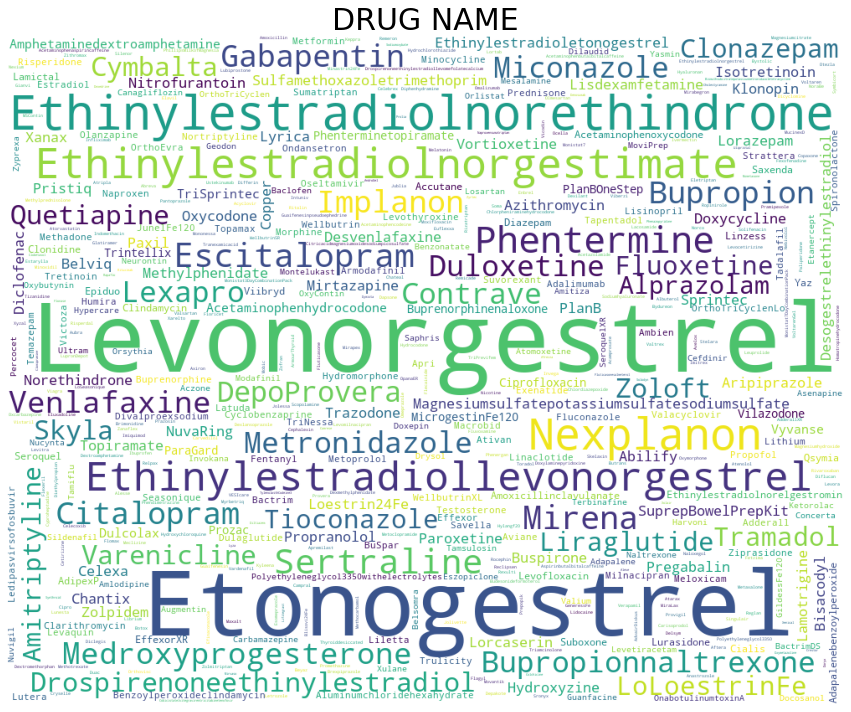

In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 500, width = 1000, height = 800).generate(str(drug))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('DRUG NAME', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [19]:
df["CONDITION"] = df["CONDITION"].str.replace(r'\W',"")
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS
0,206461,Valsartan,LeftVentricularDysfunction,"""It has no side effect, I take it in combinati...",9,no side effect
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,no side effect
2,92703,Lybrel,BirthControl,"""I used to take another oral contraceptive, wh...",5,mild side effect
3,138000,OrthoEvra,BirthControl,"""This is my first time using any form of birth...",8,no side effect
4,35696,Buprenorphinenaloxone,OpiateDependence,"""Suboxone has completely turned my life around...",9,no side effect


In [20]:
df['CONDITION'].value_counts()

BirthControl                       9764
Depression                         3072
Pain                               2011
Anxiety                            1990
Acne                               1894
                                   ... 
SmallBowelBacterialOvergrowth         1
TransverseMyelitis                    1
Neurosis                              1
Neuritis                              1
ThromboembolicStrokeProphylaxis       1
Name: CONDITION, Length: 705, dtype: int64

In [21]:
condition = ' '.join(df['CONDITION'].tolist())
condition

'LeftVentricularDysfunction ADHD BirthControl BirthControl OpiateDependence BenignProstaticHyperplasia EmergencyContraception BipolarDisorde Epilepsy BirthControl MigrainePrevention Depression CrohnsDisease Cough BirthControl Obesity UrinaryTractInfection ibromyalgia BipolarDisorde ChronicMyelogenousLeukemia HIVInfection Insomnia BirthControl RheumatoidArthritis VaginalYeastInfection ChlamydiaInfection Hirsutism ADHD PanicDisorde Migraine Depression Pain VaginalYeastInfection IrritableBowelSyndrome Osteoarthritis Constipation Pain BowelPreparation Psychosis VaginalYeastInfection Obesity PanicDisorde MuscleSpasm Depression HepatitisC HepatitisC BipolarDisorde OveractiveBladde UrinaryTractInfection DiabetesType2 ADHD Pain AsthmaMaintenance NonSmallCellLungCance Schizophrenia Dysuria BipolarDisorde SmokingCessation BirthControl Anxiety BirthControl Pain BirthControl BirthControl BowelPreparation Acne Depression BirthControl Acne HepatitisC emaleInfertility ConstipationAcute ConstipationDr

In [22]:
cond = condition.replace("BipolarDisorde","BipolarDisorder").replace("PanicDisorde","PanicDisorder").replace("MajorDepressiveDisorde ","MajorDepressiveDisorder").replace("GeneralizedAnxietyDisorde","GeneralizedAnxietyDisorder").replace("SchizoaffectiveDisorde","SchizoaffectiveDisorder").replace("SocialAnxietyDisorde","SocialAnxietyDisorder")


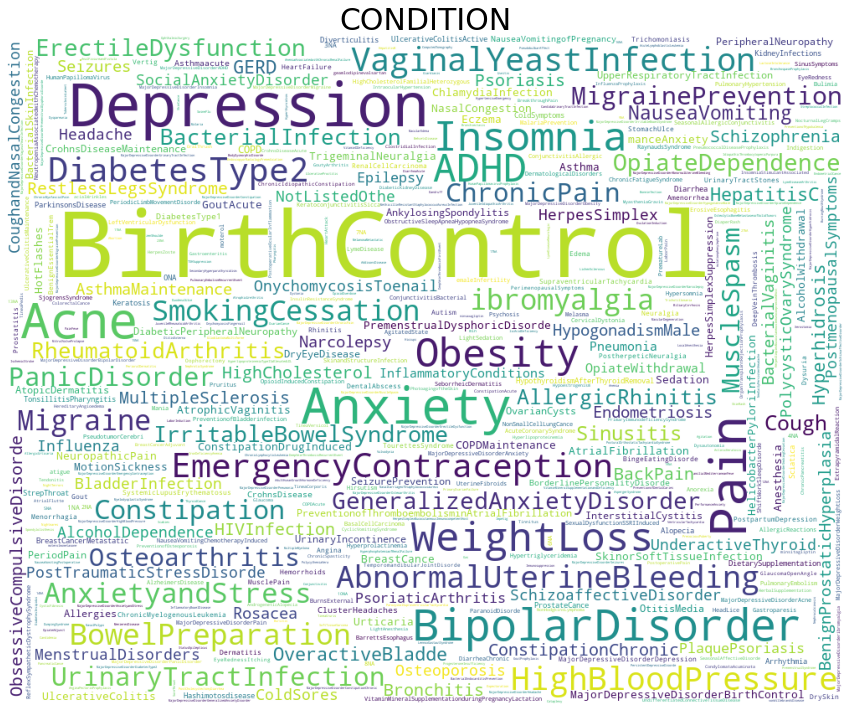

In [23]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 500, width = 1000, height = 800).generate(str(cond))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('CONDITION', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [24]:
df["REVIEW"][16645]

'"After using 2 pumps per day for 4 months total testosterone levels dropped from 224 to 174. Worthless product."'

In [25]:
df['RATING'].value_counts()

10    17295
9      9412
1      7382
8      6362
7      3201
5      2706
2      2375
3      2241
6      2114
4      1653
Name: RATING, dtype: int64

In [26]:
df['REVIEW']= df['REVIEW'].apply(lambda x: " ".join(word.lower() for word in x.split()))
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS
0,206461,Valsartan,LeftVentricularDysfunction,"""it has no side effect, i take it in combinati...",9,no side effect
1,95260,Guanfacine,ADHD,"""my son is halfway through his fourth week of ...",8,no side effect
2,92703,Lybrel,BirthControl,"""i used to take another oral contraceptive, wh...",5,mild side effect
3,138000,OrthoEvra,BirthControl,"""this is my first time using any form of birth...",8,no side effect
4,35696,Buprenorphinenaloxone,OpiateDependence,"""suboxone has completely turned my life around...",9,no side effect


In [27]:
df['REVIEW']=df['REVIEW'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [28]:
df['REVIEW']=df['REVIEW'].str.replace('[0-9]','')

In [29]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\new\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')


In [31]:
df['REVIEW']=df['REVIEW'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS
0,206461,Valsartan,LeftVentricularDysfunction,side effect take combination bystolic mg fish oil,9,no side effect
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,no side effect
2,92703,Lybrel,BirthControl,used take another oral contraceptive pill cycl...,5,mild side effect
3,138000,OrthoEvra,BirthControl,first time using form birth control im glad we...,8,no side effect
4,35696,Buprenorphinenaloxone,OpiateDependence,suboxone completely turned life around feel he...,9,no side effect


In [32]:
from textblob import Word 


In [33]:
df['REVIEW']= df['REVIEW'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [34]:
n_req= ['one','first','effect','side','taking','im','ive','mg','time','hour','could','lb','two','sideeffect','started','still','took','take','day','it']


In [35]:
df['REVIEW']=df['REVIEW'].apply(lambda x:" ".join(word for word in x.split() if word not in n_req))


In [36]:
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS
0,206461,Valsartan,LeftVentricularDysfunction,combination bystolic fish oil,9,no side effect
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,no side effect
2,92703,Lybrel,BirthControl,used another oral contraceptive pill cycle hap...,5,mild side effect
3,138000,OrthoEvra,BirthControl,using form birth control glad went patch month...,8,no side effect
4,35696,Buprenorphinenaloxone,OpiateDependence,suboxone completely turned life around feel he...,9,no side effect


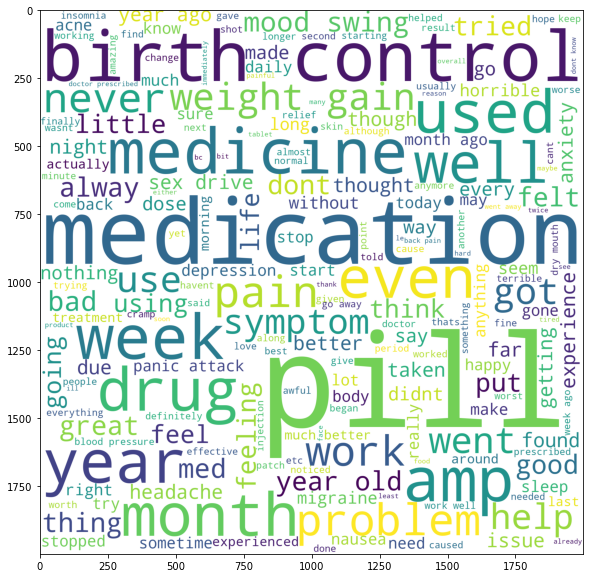

In [37]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
Review_wordcloud = ' '.join(df['REVIEW'])
wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(wordcloud)

<AxesSubplot:title={'center':'RATING '}>

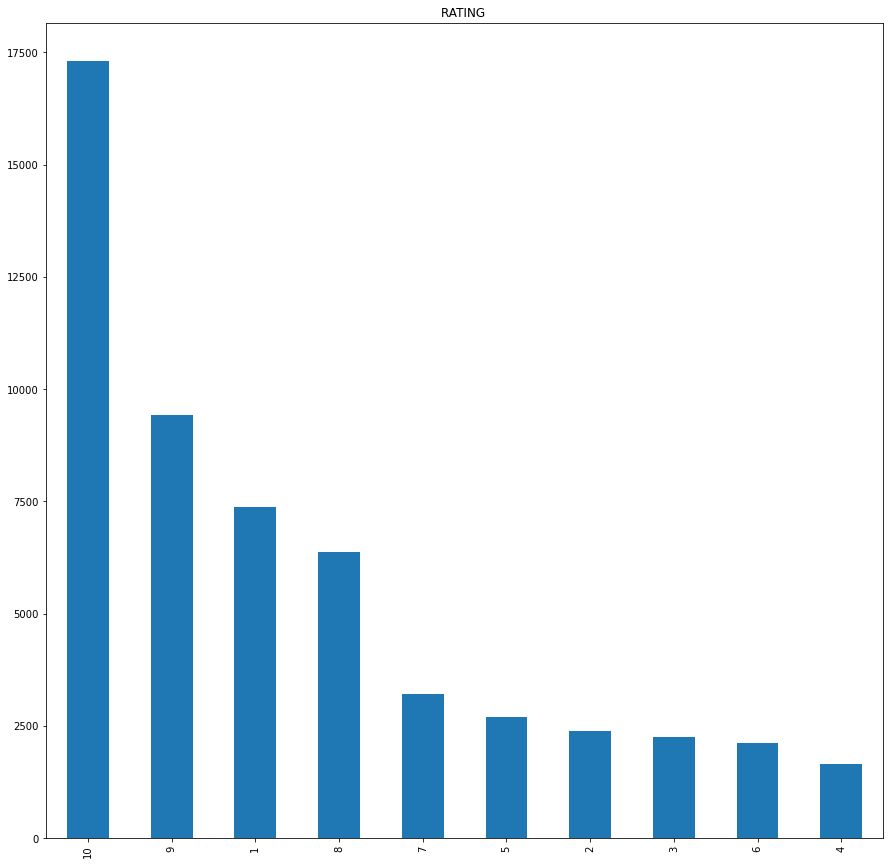

In [38]:
df['RATING'].value_counts().plot(kind='bar',title='RATING ')

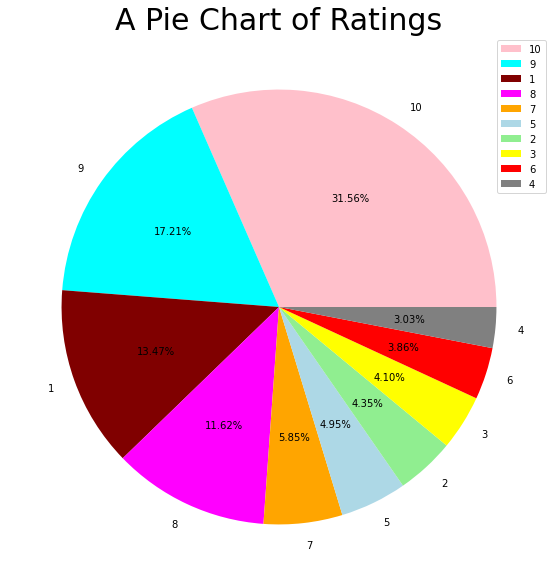

In [39]:
size = [17384, 9477, 7422, 6400, 3221, 2726, 2397, 2256,2128 , 1670]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow','red','gray']
labels = "10", "9", "1", "8", "7", "5","2","3","6", "4"
explode = [0, 0, 0]

my_circle = plt.Circle((0, 2), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [40]:
def REVIEW_SENTIMENT(row):
    if row['RATING'] < 4:
        return ("NEGATIVE")
    elif row['RATING'] >= 4 and row['RATING'] < 8:
        return ("NEUTRAL")
    else:
        return ("POSITIVE")

df['REVIEW_SENTIMENT'] = df.apply(REVIEW_SENTIMENT, axis=1)
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS,REVIEW_SENTIMENT
0,206461,Valsartan,LeftVentricularDysfunction,combination bystolic fish oil,9,no side effect,POSITIVE
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,no side effect,POSITIVE
2,92703,Lybrel,BirthControl,used another oral contraceptive pill cycle hap...,5,mild side effect,NEUTRAL
3,138000,OrthoEvra,BirthControl,using form birth control glad went patch month...,8,no side effect,POSITIVE
4,35696,Buprenorphinenaloxone,OpiateDependence,suboxone completely turned life around feel he...,9,no side effect,POSITIVE


In [41]:
avg_rating = (df['RATING'].groupby(df['DRUGNAME']).mean())
avg_rating

DRUGNAME
ABOtic                            10.000000
ADCrackedSkinRelief               10.000000
Abacavirdolutegravirlamivudine     8.375000
Abacavirlamivudinezidovudine       9.000000
Abatacept                          9.750000
                                    ...    
Zytiga                             9.000000
Zyvox                              9.333333
ZzzQuil                            1.000000
ella                               6.105263
femhrt                             5.500000
Name: RATING, Length: 2576, dtype: float64

In [42]:
df['REVIEW_SENTIMENT'].value_counts()

POSITIVE    33069
NEGATIVE    11998
NEUTRAL      9674
Name: REVIEW_SENTIMENT, dtype: int64

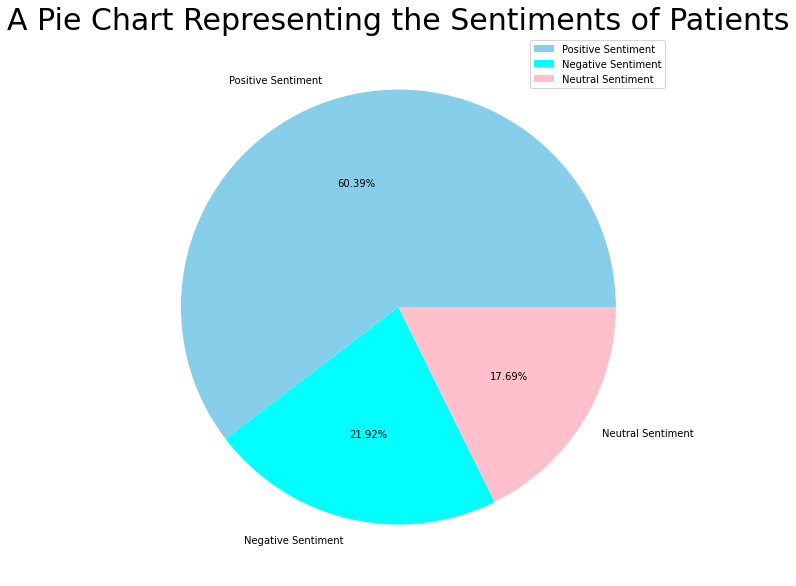

In [43]:
# a pie chart to represent the sentiments of the patients

size = [33261, 12075,9745]
colors = ['skyblue', 'cyan','pink']
labels = "Positive Sentiment","Negative Sentiment","Neutral Sentiment"
explode = [0, 0, 0]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

In [44]:
df.columns

Index(['UNIQUE ID', 'DRUGNAME', 'CONDITION', 'REVIEW', 'RATING',
       'SIDE_EFFECTS', 'REVIEW_SENTIMENT'],
      dtype='object')

In [45]:
df

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS,REVIEW_SENTIMENT
0,206461,Valsartan,LeftVentricularDysfunction,combination bystolic fish oil,9,no side effect,POSITIVE
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,no side effect,POSITIVE
2,92703,Lybrel,BirthControl,used another oral contraceptive pill cycle hap...,5,mild side effect,NEUTRAL
3,138000,OrthoEvra,BirthControl,using form birth control glad went patch month...,8,no side effect,POSITIVE
4,35696,Buprenorphinenaloxone,OpiateDependence,suboxone completely turned life around feel he...,9,no side effect,POSITIVE
...,...,...,...,...,...,...,...
55076,117277,Robaxin750,OpiateWithdrawal,minor withdrawls heroin use really trick compl...,9,no side effect,POSITIVE
55077,63918,Sertraline,AnxietyandStress,born anxious various med life selfmedicating m...,9,no side effect,POSITIVE
55078,71502,Vraylar,BipolarDisorde,become forgetful daze alot hard breathing some...,4,mild side effect,NEUTRAL
55079,97587,Synvisc,Osteoarthritis,horrible pain injection numbing point light he...,1,severe side effect,NEGATIVE


In [46]:
def SIDEEFFECTS(row):
    if row['SIDE_EFFECTS'] =="severe side effect":
        return ("YES")
    elif row['SIDE_EFFECTS'] == "mild side effect":
        return ("NO")
    else:
        return ("NO")

df['SIDEEFFECTS'] = df.apply(SIDEEFFECTS, axis=1)
df.head()

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS,REVIEW_SENTIMENT,SIDEEFFECTS
0,206461,Valsartan,LeftVentricularDysfunction,combination bystolic fish oil,9,no side effect,POSITIVE,NO
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,no side effect,POSITIVE,NO
2,92703,Lybrel,BirthControl,used another oral contraceptive pill cycle hap...,5,mild side effect,NEUTRAL,NO
3,138000,OrthoEvra,BirthControl,using form birth control glad went patch month...,8,no side effect,POSITIVE,NO
4,35696,Buprenorphinenaloxone,OpiateDependence,suboxone completely turned life around feel he...,9,no side effect,POSITIVE,NO


In [47]:
df.to_csv('C:/Users/new/Documents/Book2.csv')


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
labelencoder=LabelEncoder()

In [50]:
df[ 'RESULT' ]= labelencoder.fit_transform(df[ 'SIDEEFFECTS' ])   
df[ 'RESULT' ].unique()
 

array([0, 1])

In [51]:
df

,UNIQUE ID,DRUGNAME,CONDITION,REVIEW,RATING,SIDE_EFFECTS,REVIEW_SENTIMENT,SIDEEFFECTS,RESULT
0,206461,Valsartan,LeftVentricularDysfunction,combination bystolic fish oil,9,no side effect,POSITIVE,NO,0
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,no side effect,POSITIVE,NO,0
2,92703,Lybrel,BirthControl,used another oral contraceptive pill cycle hap...,5,mild side effect,NEUTRAL,NO,0
3,138000,OrthoEvra,BirthControl,using form birth control glad went patch month...,8,no side effect,POSITIVE,NO,0
4,35696,Buprenorphinenaloxone,OpiateDependence,suboxone completely turned life around feel he...,9,no side effect,POSITIVE,NO,0
...,...,...,...,...,...,...,...,...,...
55076,117277,Robaxin750,OpiateWithdrawal,minor withdrawls heroin use really trick compl...,9,no side effect,POSITIVE,NO,0
55077,63918,Sertraline,AnxietyandStress,born anxious various med life selfmedicating m...,9,no side effect,POSITIVE,NO,0
55078,71502,Vraylar,BipolarDisorde,become forgetful daze alot hard breathing some...,4,mild side effect,NEUTRAL,NO,0
55079,97587,Synvisc,Osteoarthritis,horrible pain injection numbing point light he...,1,severe side effect,NEGATIVE,YES,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54741 entries, 0 to 55080
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UNIQUE ID         54741 non-null  int64 
 1   DRUGNAME          54741 non-null  object
 2   CONDITION         54741 non-null  object
 3   REVIEW            54741 non-null  object
 4   RATING            54741 non-null  int64 
 5   SIDE_EFFECTS      54741 non-null  object
 6   REVIEW_SENTIMENT  54741 non-null  object
 7   SIDEEFFECTS       54741 non-null  object
 8   RESULT            54741 non-null  int32 
dtypes: int32(1), int64(2), object(6)
memory usage: 6.5+ MB


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [76]:
nbs=CountVectorizer(max_features=20934)
X = nbs.fit_transform(df.REVIEW)
y=df.SIDEEFFECTS

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)


In [78]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report



In [79]:
nbs2 = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001,C=0.55, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=42, max_iter=1000)


In [80]:
nbs2.fit(X_train, y_train)

LinearSVC(C=0.55, random_state=42)

In [81]:
y_pred = nbs2.predict(X_test)

In [82]:
print('accuracy on train set %s' % accuracy_score(y_train, nbs2.predict(X_train)))
print('accuracy on test set %s' % accuracy_score(y_pred, y_test))

accuracy on train set 0.9478900255754475
accuracy on test set 0.8385240661247603


In [83]:
report = classification_report(y_test, y_pred)
print('Classification Report Logistic regression: \n', report)

Classification Report Logistic regression: 
               precision    recall  f1-score   support

          NO       0.89      0.91      0.90      8549
         YES       0.64      0.60      0.62      2400

    accuracy                           0.84     10949
   macro avg       0.77      0.75      0.76     10949
weighted avg       0.83      0.84      0.84     10949



In [72]:
print(confusion_matrix(y_pred,y_test))

[[7745  964]
 [ 804 1436]]
